In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV,train_test_split
import warnings 
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
import numpy as np
from tabulate import tabulate

In [44]:
df=pd.read_csv('Cleaned_Zomato.csv')
df

,Column1,name,online_order,book_table,rate,votes,location,cuisines,Cost2plates,Types
0,0,Jalsa,Yes,Yes,4.100000,775,Banashankari,NorthIndian,800,Buffet
1,0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Mughlai,800,Buffet
2,0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Chinese,800,Buffet
3,1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Chinese,800,Buffet
4,1,Spice Elephant,Yes,No,4.100000,787,Banashankari,NorthIndian,800,Buffet
...,...,...,...,...,...,...,...,...,...,...
81466,51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.700142,0,Whitefield,FingerFood,2000,Pubs and bars
81467,51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",FingerFood,2500,Pubs and bars
81468,51716,The Nest - The Den Bengaluru,No,No,3.400000,13,"ITPL Main Road, Whitefield",FingerFood,1500,Pubs and bars
81469,51716,The Nest - The Den Bengaluru,No,No,3.400000,13,"ITPL Main Road, Whitefield",NorthIndian,1500,Pubs and bars


In [45]:
df.drop('Column1',axis=1,inplace=True)
df.drop('name',axis=1,inplace=True)
df

,online_order,book_table,rate,votes,location,cuisines,Cost2plates,Types
0,Yes,Yes,4.100000,775,Banashankari,NorthIndian,800,Buffet
1,Yes,Yes,4.100000,775,Banashankari,Mughlai,800,Buffet
2,Yes,Yes,4.100000,775,Banashankari,Chinese,800,Buffet
3,Yes,No,4.100000,787,Banashankari,Chinese,800,Buffet
4,Yes,No,4.100000,787,Banashankari,NorthIndian,800,Buffet
...,...,...,...,...,...,...,...,...
81466,No,No,3.700142,0,Whitefield,FingerFood,2000,Pubs and bars
81467,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",FingerFood,2500,Pubs and bars
81468,No,No,3.400000,13,"ITPL Main Road, Whitefield",FingerFood,1500,Pubs and bars
81469,No,No,3.400000,13,"ITPL Main Road, Whitefield",NorthIndian,1500,Pubs and bars


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81471 entries, 0 to 81470
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  81471 non-null  object 
 1   book_table    81471 non-null  object 
 2   rate          81471 non-null  float64
 3   votes         81471 non-null  int64  
 4   location      81471 non-null  object 
 5   cuisines      81471 non-null  object 
 6   Cost2plates   81471 non-null  int64  
 7   Types         81471 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 5.0+ MB


In [47]:
df.duplicated().sum()

3217

In [48]:
df.drop_duplicates(keep='first',inplace=True)

In [49]:
def data_type(df1):
    cat=[]
    num=[]
    for col in df1:
        if df1[col].nunique()<43:
            cat.append(col)
        else:
            num.append(col)
    return cat,num

cat_var,num_var=data_type(df)
print(tabulate({'Categorical':cat_var,'Numerical':num_var},headers=['Categorical','Numerical']))

Categorical    Numerical
-------------  -----------
online_order   votes
book_table     location
rate           cuisines
Types          Cost2plates


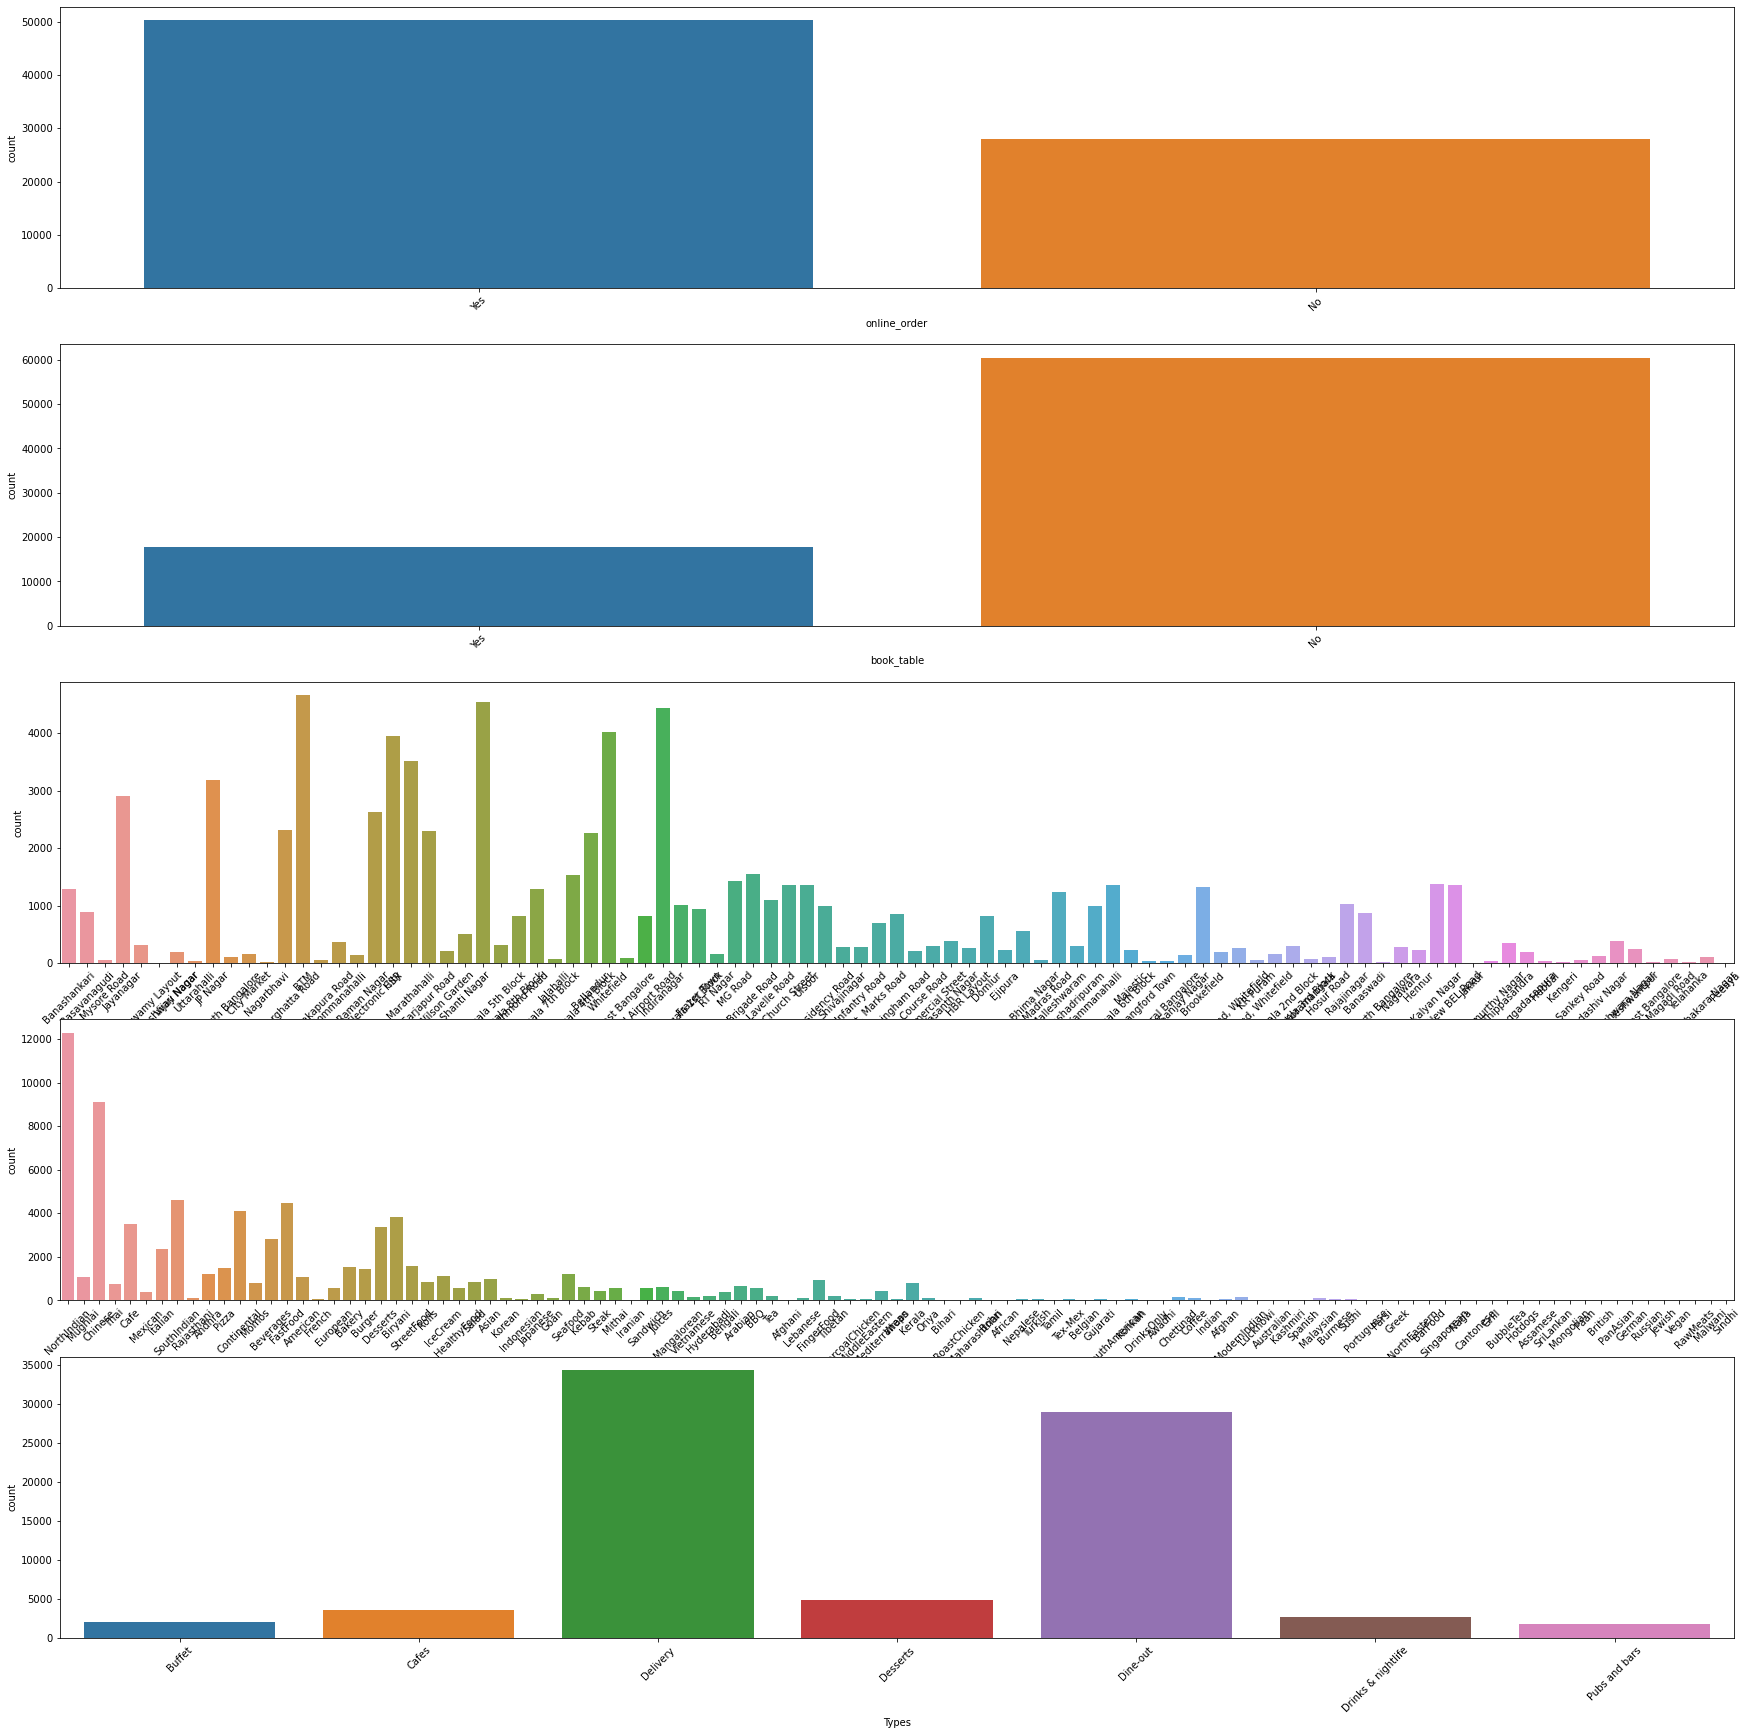

In [50]:
fig,ax=plt.subplots(5,1,figsize=(30,30))
a=df.select_dtypes('object')
a=a.columns
ax=ax.ravel()
for i,j in zip(a,range(6)):
    sns.countplot(data=df,x=i,ax=ax[j])
    ax[j].set_xticklabels(ax[j].get_xticklabels(), rotation=45)

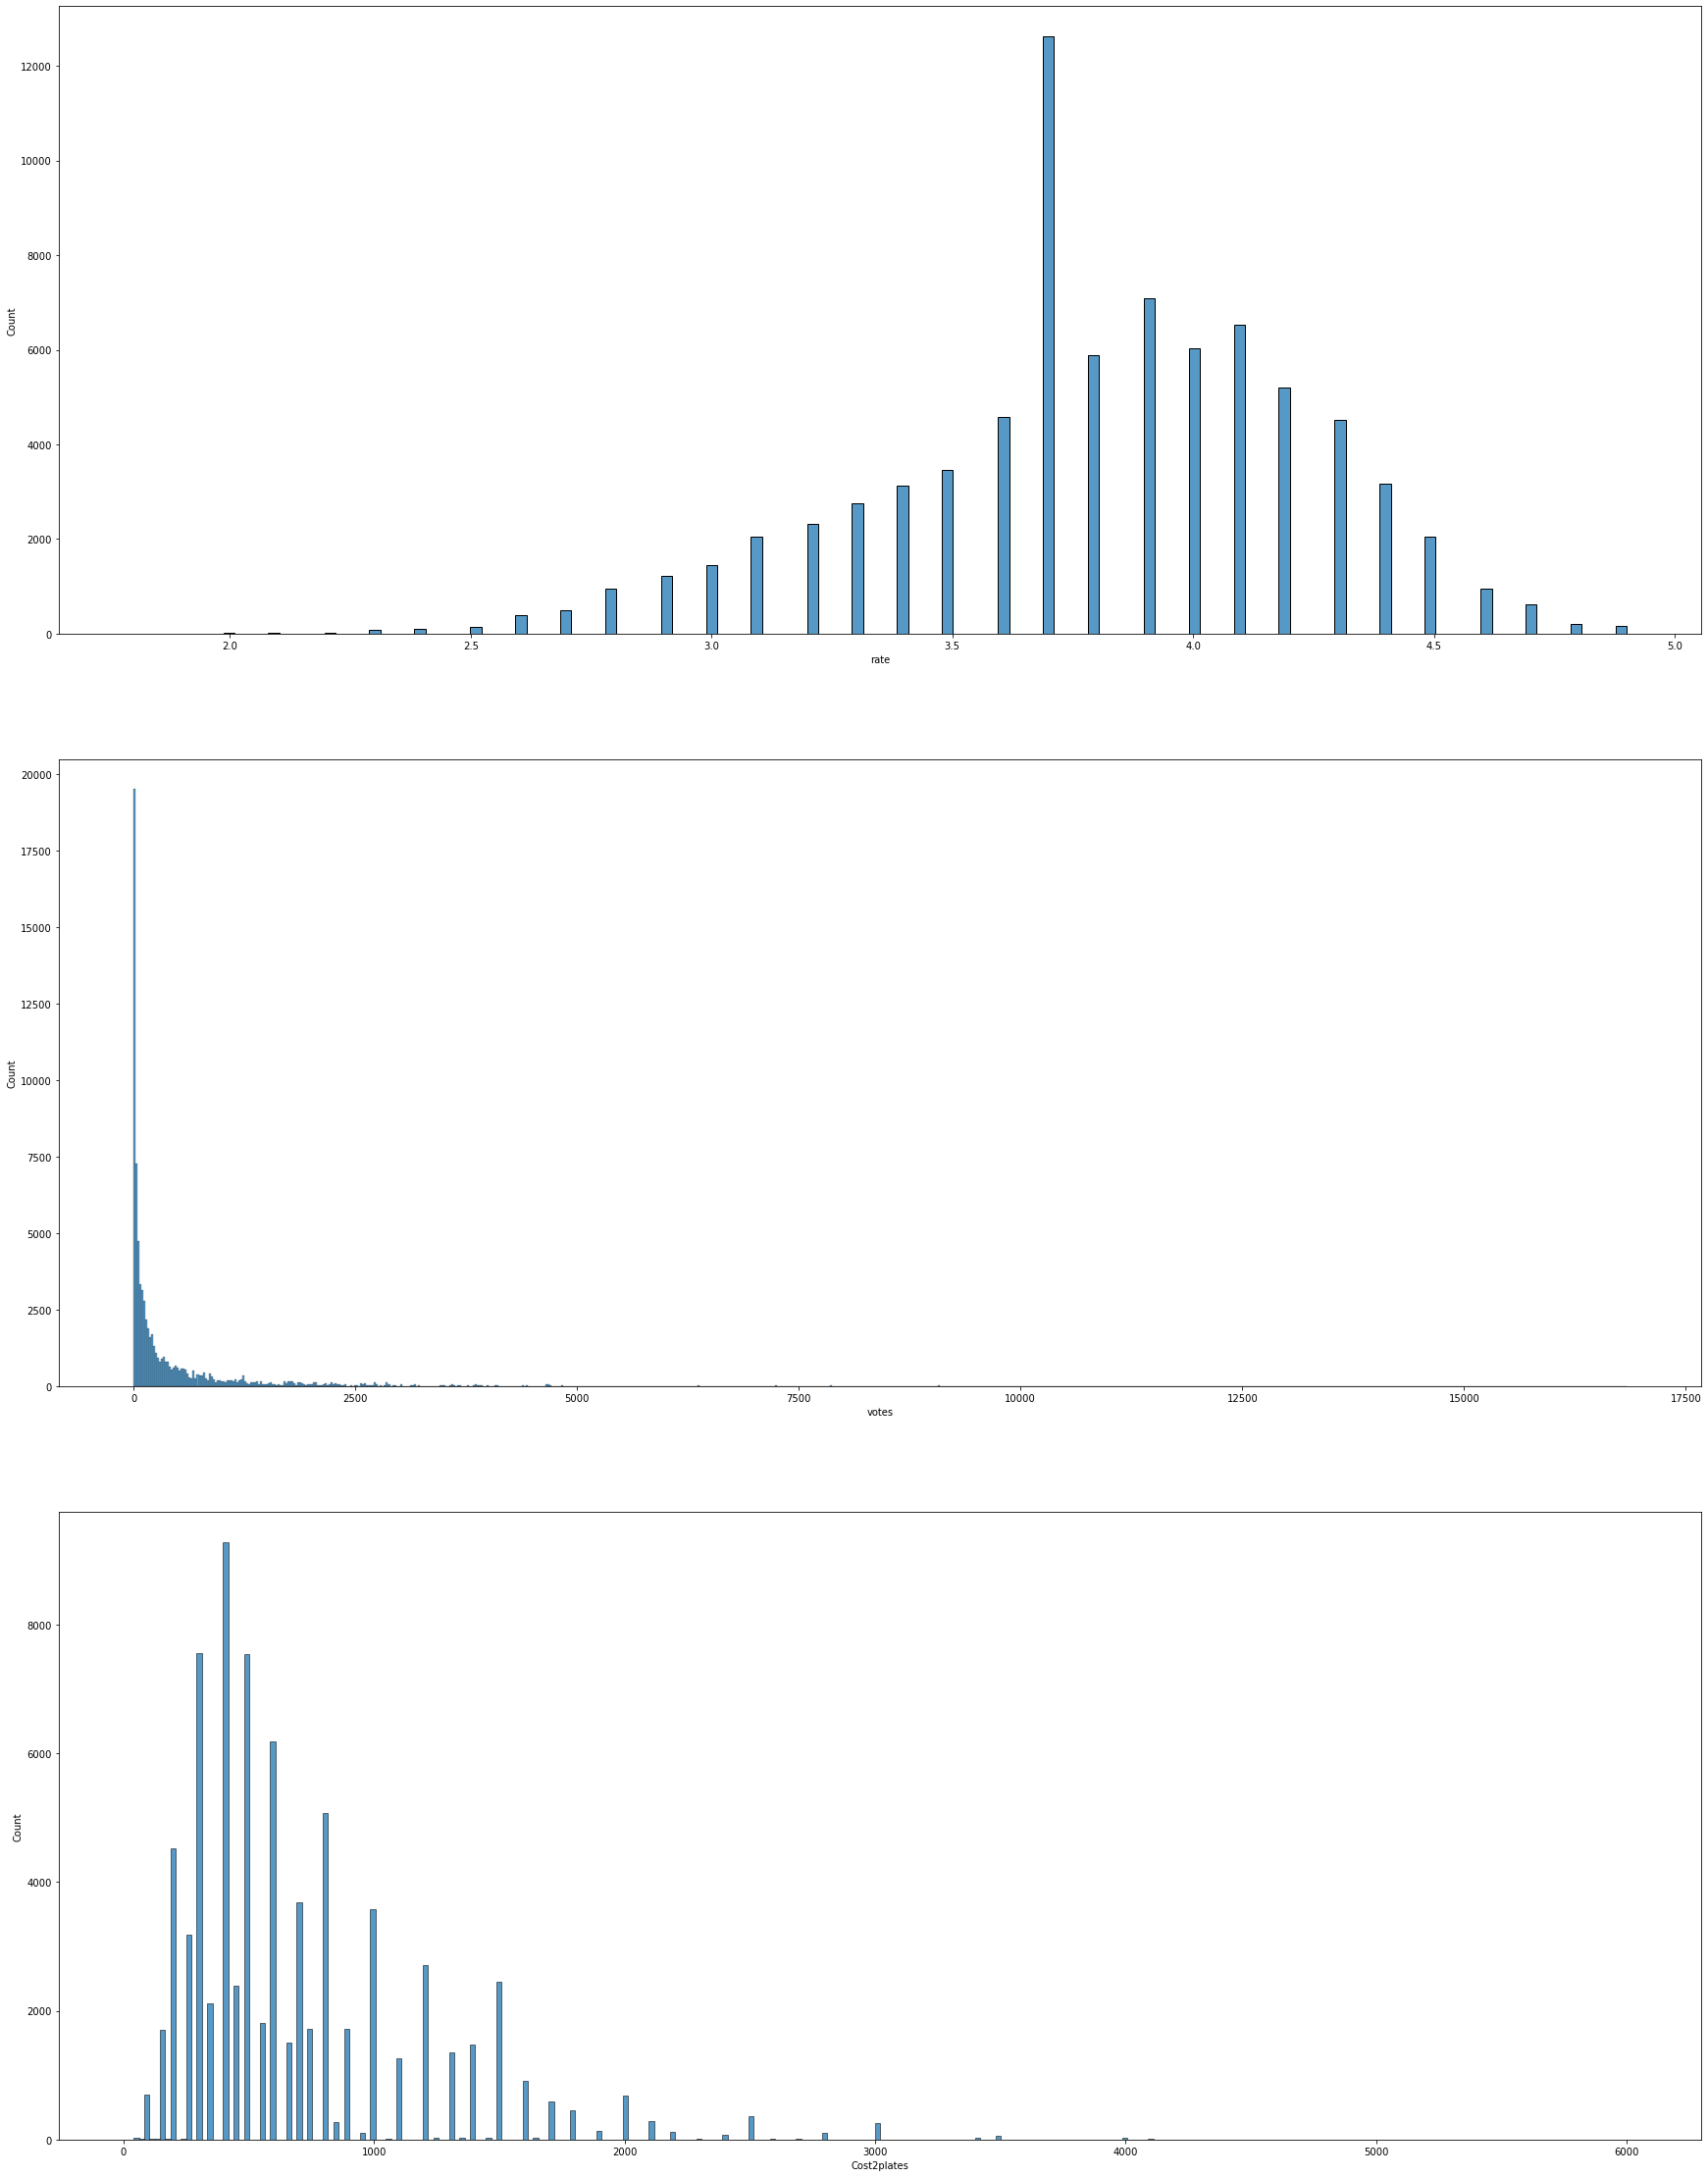

In [51]:
fig,ax=plt.subplots(3,1,figsize=(30,40))
a=df.select_dtypes(['int64','float64'])
a=a.columns
ax=ax.ravel()
for i,j in zip(a,range(6)):
    sns.histplot(data=df,x=i,ax=ax[j])
#     ax[j].set_xticklabels(ax[j].get_xticklabels(), rotation=45)

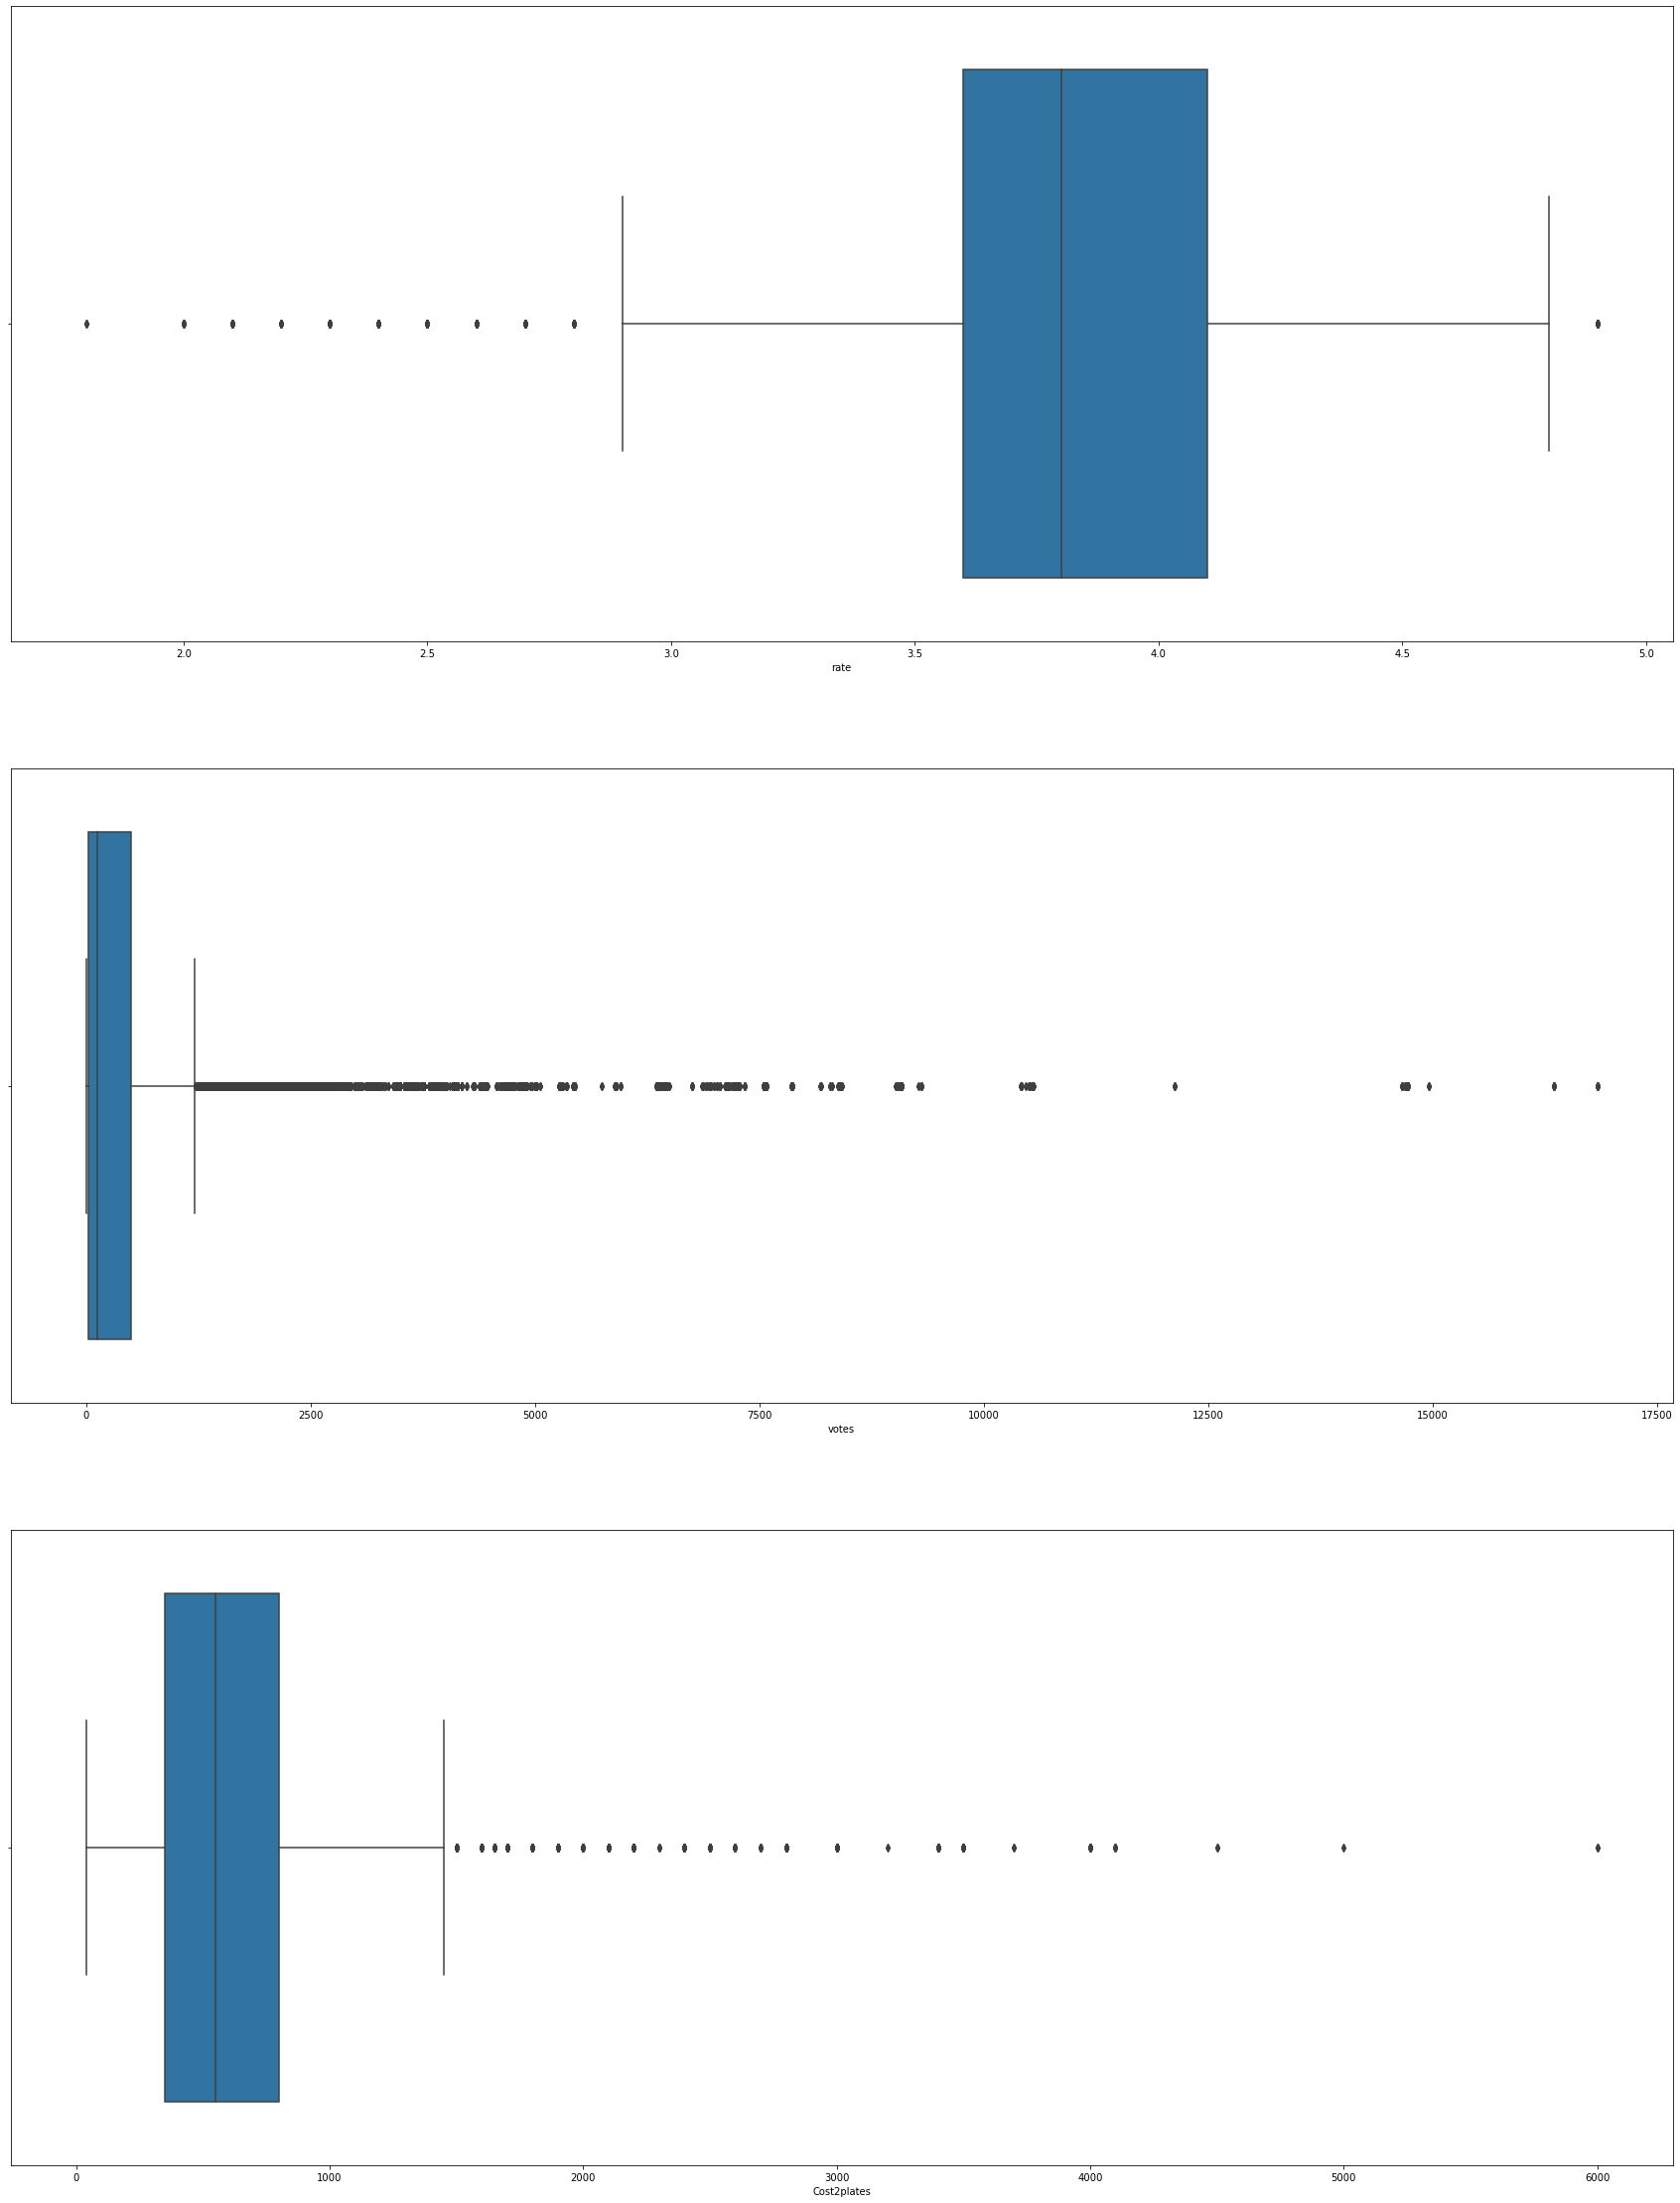

In [52]:
fig,ax=plt.subplots(3,1,figsize=(30,40))
a=df.select_dtypes(['int64','float64'])
a=a.columns
ax=ax.ravel()
for i,j in zip(a,range(6)):
    sns.boxplot(data=df,x=i,ax=ax[j])

In [53]:
#Label Encoding
a=df.select_dtypes('object')
for i in a.columns:
    df[i]=LabelEncoder().fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78254 entries, 0 to 81470
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   online_order  78254 non-null  int32  
 1   book_table    78254 non-null  int32  
 2   rate          78254 non-null  float64
 3   votes         78254 non-null  int64  
 4   location      78254 non-null  int32  
 5   cuisines      78254 non-null  int32  
 6   Cost2plates   78254 non-null  int64  
 7   Types         78254 non-null  int32  
dtypes: float64(1), int32(5), int64(2)
memory usage: 5.9 MB


In [54]:
#Scalling
scalled_df=pd.DataFrame(MinMaxScaler().fit_transform(df),columns=df.columns)
scalled_df

,online_order,book_table,rate,votes,location,cuisines,Cost2plates,Types
0,1.0,1.0,0.741935,0.046043,0.010870,0.698113,0.127517,0.0
1,1.0,1.0,0.741935,0.046043,0.010870,0.660377,0.127517,0.0
2,1.0,1.0,0.741935,0.046043,0.010870,0.254717,0.127517,0.0
3,1.0,0.0,0.741935,0.046756,0.010870,0.254717,0.127517,0.0
4,1.0,0.0,0.741935,0.046756,0.010870,0.698113,0.127517,0.0
...,...,...,...,...,...,...,...,...
78249,0.0,0.0,0.612949,0.000000,0.967391,0.320755,0.328859,1.0
78250,0.0,1.0,0.806452,0.014021,0.282609,0.320755,0.412752,1.0
78251,0.0,0.0,0.516129,0.000772,0.282609,0.320755,0.244966,1.0
78252,0.0,0.0,0.516129,0.000772,0.282609,0.698113,0.244966,1.0


<AxesSubplot:>

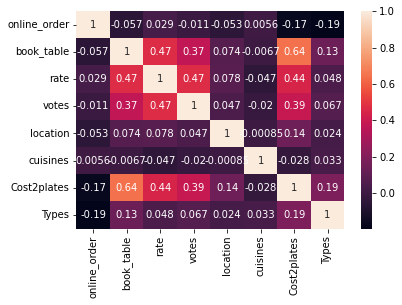

In [55]:
#coreleation matrix
corr_mat=df.corr()
sns.heatmap(corr_mat,annot=True)

In [56]:
#the Independent columns are not highly corelated to each other.

In [57]:
x=scalled_df.drop('Cost2plates',axis=1)
y=df.Cost2plates

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Linear Regression

using kfold to split the data and will get the range how the model will poorly perform to beter performance of model.

In [59]:
model1=LinearRegression().fit(x_train,y_train)
y_pred=model1.predict(x_test)

In [60]:
print(len(x_test))
print(len(x_train))

23477
54777


In [61]:
a=model1.score(x_train,y_train)
b=model1.score(x_test,y_test)

In [62]:
trainadjustedr2=1-(1-a)*(54777-1)/(54777-7-1) 
testadjustedr2=1-(1-b)*(23477-1)/(23477-7-1)

In [63]:
print('R Score Training: ',trainadjustedr2)
print('R Score Test: ',testadjustedr2)

R Score Training:  0.47994077280280745
R Score Test:  0.48854183612866375


In [64]:
print('RMSE : ',mean_squared_error(y_test,y_pred,squared=False))
print('MAE  : ',mean_absolute_error(y_test,y_pred))
print('MAPE  : ',mean_absolute_percentage_error(y_test,y_pred))

RMSE :  346.0646682463181
MAE  :  242.48798908754216
MAPE  :  0.5009953602520533


In [65]:
# Model is underfitting and poverly performing

# Decission Tree Regressor

In [66]:
kf=KFold(n_splits=5,random_state=42,shuffle=True)

In [67]:
dt=DecisionTreeRegressor(random_state=42).fit(x_train,y_train)

In [68]:
param_grid={'min_samples_split':[3,5,7,9,10,40,80,100],
           'min_samples_leaf':[1,3,4,5,6,7,8,10,40,80,100],
           'max_depth':[10,30,40,50,60,70,80],
           'max_features':[2,3,4,5,6,7]}

In [69]:
gridcv=GridSearchCV(dt,param_grid,cv=kf)

In [70]:
gridcv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [10, 30, 40, 50, 60, 70, 80],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 3, 4, 5, 6, 7, 8, 10, 40, 80,
                                              100],
                         'min_samples_split': [3, 5, 7, 9, 10, 40, 80, 100]})

In [71]:
gridcv.best_score_

0.8410633086117709

In [72]:
gridcv.best_estimator_

DecisionTreeRegressor(max_depth=40, max_features=6, min_samples_split=9,
                      random_state=42)

In [73]:
model2=DecisionTreeRegressor(max_depth=40, max_features=6, min_samples_split=9,random_state=42).fit(x_train,y_train)
y_pred2=model2.predict(x_test)

In [74]:
print('R Score Training: ',model2.score(x_train,y_train))
print('R Score Test: ',model2.score(x_test,y_test))

R Score Training:  0.9570835547033023
R Score Test:  0.8662351517996361


In [75]:
print('RMSE : ',mean_squared_error(y_test,y_pred2,squared=False))
print('MAE  : ',mean_absolute_error(y_test,y_pred2))
print('MAPE  : ',mean_absolute_percentage_error(y_test,y_pred2))

RMSE :  177.0059897344001
MAE  :  89.65355645889892
MAPE  :  0.2316406007936899


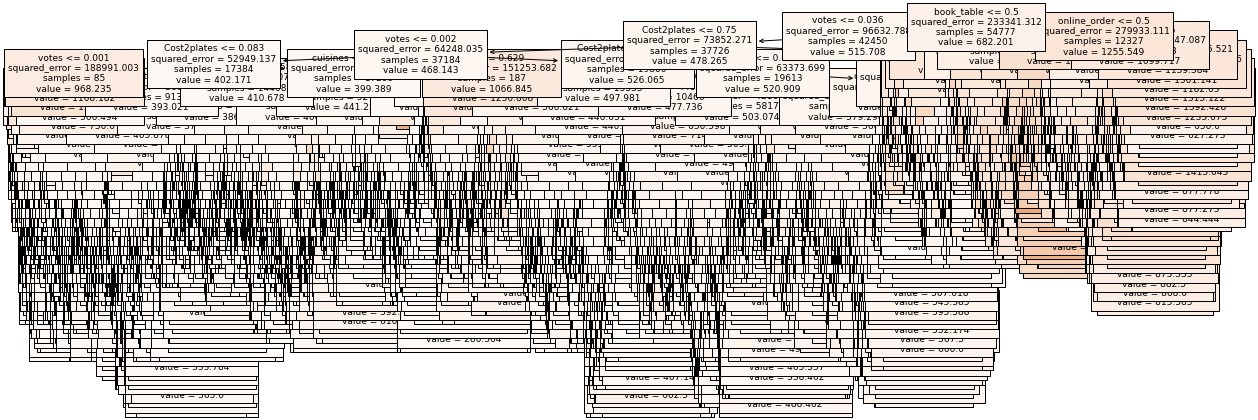

In [76]:
plt.figure(figsize=(20,7))
tree.plot_tree(model2,feature_names=df.columns,filled=True,fontsize=9)
plt.show()

# Random Foresst Regressor

In [82]:
rf=RandomForestRegressor(random_state=42).fit(x_train,y_train)

In [83]:
param_grid={'n_estimators':[50,70,100],
           'min_samples_split':[10,40,80,100],
           'min_samples_leaf':[8,10,40,80,100],
           'max_depth':[70,80]}

In [84]:
grid_cv2=GridSearchCV(rf,param_grid,cv=kf)

In [85]:
grid_cv2.fit(x_train,y_train)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [70, 80],
                         'min_samples_leaf': [8, 10, 40, 80, 100],
                         'min_samples_split': [10, 40, 80, 100],
                         'n_estimators': [50, 70, 100]})

In [86]:
grid_cv2.best_score_

0.8371686754464763

In [87]:
grid_cv2.best_estimator_

RandomForestRegressor(max_depth=70, min_samples_leaf=8, min_samples_split=10,
                      random_state=42)

In [88]:
model3=RandomForestRegressor(max_depth=70, min_samples_leaf=8, min_samples_split=10,random_state=42).fit(x_train,y_train)
y_pred3=model3.predict(x_test)

In [90]:
print('R Score Training: ',model3.score(x_train,y_train))
print('R Score Test: ',model3.score(x_test,y_test))

R Score Training:  0.8936546439838495
R Score Test:  0.8595255830281759


In [96]:
print('RMSE : ',mean_squared_error(y_test,y_pred3,squared=False))
print('MAE  : ',mean_absolute_error(y_test,y_pred3))
print('MAPE  : ',mean_absolute_percentage_error(y_test,y_pred3))

RMSE :  181.3909358174807
MAE  :  113.75290890104763
MAPE  :  0.2634994670229536


# Stacking

In [92]:
level1=[]
level1.append(('lr',LinearRegression()))
level1.append(('KNN',KNeighborsRegressor()))
level1.append(('SVM',SVR()))
level1.append(('DT',DecisionTreeRegressor(max_depth=40, max_features=6, min_samples_split=9,random_state=42)))
level1.append(('RF',RandomForestRegressor(max_depth=70, min_samples_leaf=8, min_samples_split=10,random_state=42)))
level2=LinearRegression()
stac_model=StackingRegressor(estimators=level1,final_estimator=level2,cv=kf)

In [93]:
model4=stac_model.fit(x_train,y_train)
y_pred4=model4.predict(x_test)

In [94]:
print('R Score Training: ',model4.score(x_train,y_train))
print('R Score Test: ',model4.score(x_test,y_test))

R Score Training:  0.9464196804871242
R Score Test:  0.8894852175369151


In [95]:
print('RMSE : ',mean_squared_error(y_test,y_pred4,squared=False))
print('MAE  : ',mean_absolute_error(y_test,y_pred4))
print('MAPE  : ',mean_absolute_percentage_error(y_test,y_pred4))

RMSE :  160.88929506615332
MAE  :  96.08476882533594
MAPE  :  0.23180016786835297


In [97]:
# Stacking has the less error as compared to other models

In [120]:
z=x.iloc[3].values
z=z.reshape(1,-1)

In [122]:
y_pred4=model4.predict(z)
y_pred4

array([765.91687949])

# Pickling the model

In [124]:
import pickle

In [126]:
pickle.dump(model4,open('stackregmodel.pkl','wb'))

In [127]:
pickled_model=pickle.load(open('stackregmodel.pkl','rb'))

In [129]:
pickled_model.predict(z)

array([765.91687949])